In [1]:
import pandas as pd
import numpy as np


In [3]:
df = pd.read_csv('../data/fmcg_sales_3years_1M_rows.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100000 entries, 0 to 1099999
Data columns (total 33 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   date            1100000 non-null  object 
 1   year            1100000 non-null  int64  
 2   month           1100000 non-null  int64  
 3   day             1100000 non-null  int64  
 4   weekofyear      1100000 non-null  int64  
 5   weekday         1100000 non-null  int64  
 6   is_weekend      1100000 non-null  int64  
 7   is_holiday      1100000 non-null  int64  
 8   temperature     1100000 non-null  float64
 9   rain_mm         1100000 non-null  float64
 10  store_id        1100000 non-null  object 
 11  country         1100000 non-null  object 
 12  city            1100000 non-null  object 
 13  channel         1100000 non-null  object 
 14  latitude        1100000 non-null  float64
 15  longitude       1100000 non-null  float64
 16  sku_id          1100000 non-null  ob

In [4]:
df.head()

,date,year,month,day,weekofyear,weekday,is_weekend,is_holiday,temperature,rain_mm,...,discount_pct,promo_flag,gross_sales,net_sales,stock_on_hand,stock_out_flag,lead_time_days,supplier_id,purchase_cost,margin_pct
0,2021-01-01,2021,1,1,53,4,0,1,8.44,1.24,...,0.1,1,167.84,151.06,248,0,11,S008,7.53,0.182
1,2021-01-02,2021,1,2,53,5,1,0,12.61,1.12,...,0.0,0,125.88,125.88,238,0,6,S057,5.19,0.505
2,2021-01-03,2021,1,3,53,6,1,0,12.02,2.69,...,0.3,1,398.62,279.03,238,0,6,S017,5.59,0.168
3,2021-01-04,2021,1,4,1,0,0,0,7.76,4.65,...,0.0,0,83.92,83.92,216,0,7,S012,7.81,0.255
4,2021-01-05,2021,1,5,1,1,0,0,11.16,1.77,...,0.2,1,178.33,142.66,372,0,8,S038,7.62,0.073


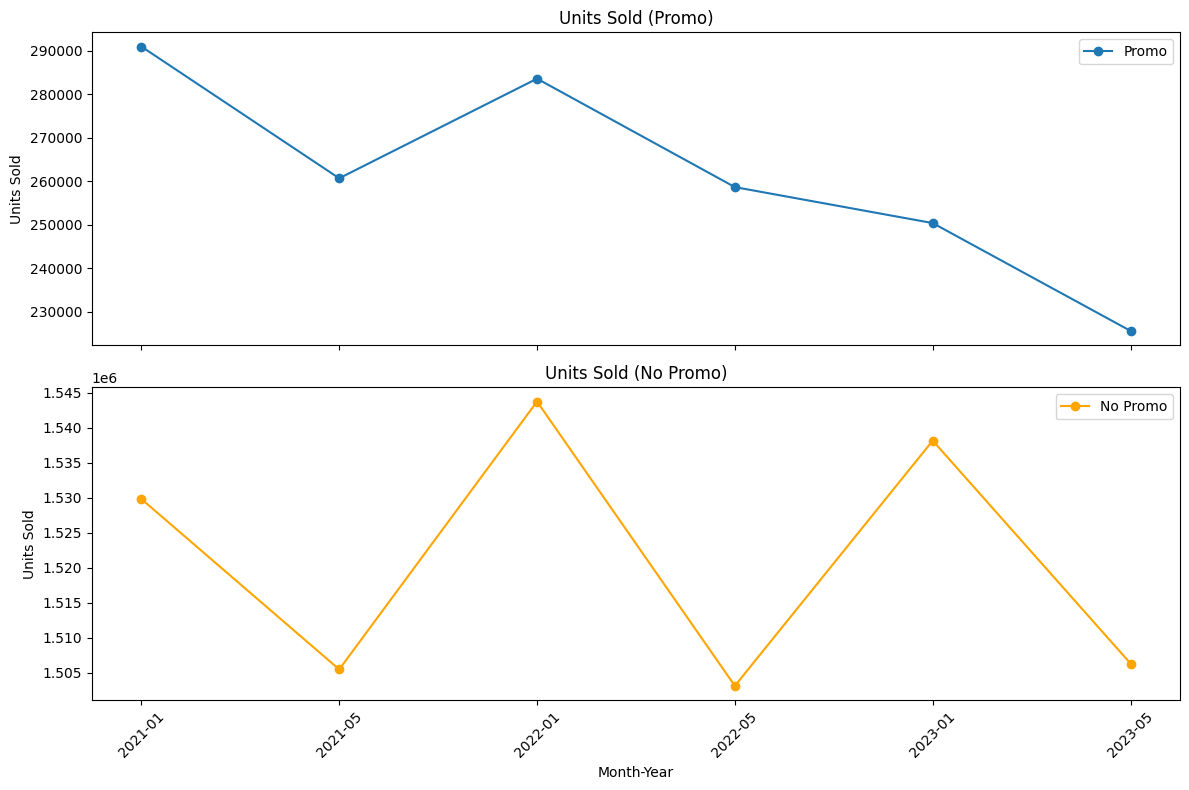

In [6]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Prepare month-year column
df['month_year'] = pd.to_datetime(df['date']).dt.to_period('M').astype(str)

# Filter for Jan and May of each year
months_to_plot = ['01', '05']
selected = df[df['month'].astype(str).str.zfill(2).isin(months_to_plot)]

# Group by month_year and promo_flag
grouped = selected.groupby(['month_year', 'promo_flag'])['units_sold'].sum().reset_index()

# Pivot for plotting
pivoted = grouped.pivot(index='month_year', columns='promo_flag', values='units_sold')

# Plot promo_flag == 1
axes[0].plot(pivoted.index, pivoted.get(1, pd.Series()), marker='o', label='Promo')
axes[0].set_title('Units Sold (Promo)')
axes[0].set_ylabel('Units Sold')
axes[0].legend()

# Plot promo_flag == 0
axes[1].plot(pivoted.index, pivoted.get(0, pd.Series()), marker='o', color='orange', label='No Promo')
axes[1].set_title('Units Sold (No Promo)')
axes[1].set_ylabel('Units Sold')
axes[1].legend()

plt.xticks(rotation=45)
plt.xlabel('Month-Year')
plt.tight_layout()
plt.show()

In [11]:
df['promo_flag'].value_counts()

promo_flag
0    1011743
1      88257
Name: count, dtype: int64